# Audio Signal Processing with Python

#### This notebook demonstrates methods to generate sine waves, perform DFT analysis on real and complex sine waves, IDFT analysis to reconstruct the original signal from the spectrum

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Generating a Real sine wave

For generating a real sine wave, we need
- Amplitude
- frequency
- phase (optional)
- sampling rate ( sampling frequency, in audio processing generally 44100Hz)


In [2]:
A = 0.8        # Amplitude
f0 = 1000      # Frequency of the signal
phi = np.pi/2  # Phase
fs = 44100     # Sampling frequency

In [3]:
# Time axis
t = np.arange(-0.002, 0.002, 1.0/fs)
# Generates time values from -0.002 to 0.002 with a step of 1/sampling frequency

#### We can also generate time axis
t = np.arange(0, 0.04, 1.0/fs) # If a time axis from zero is needed

In [4]:
# Signal generation
x = A * np.cos( 2 * np.pi * f0 * t + phi)
# x = A * cos(2*pi*f*t + phi) = A * cos(w*t + phi) [where w = 2*pi*f]

In [5]:
def genSine(A, f, phi, fs, t):
    """
    Inputs:
        A (float) =  amplitude of the sinusoid
        f (float) = frequency of the sinusoid in Hz
        phi (float) = initial phase of the sinusoid in radians
        fs (float) = sampling frequency of the sinusoid in Hz
        t (float) =  duration of the sinusoid (is second)
    Output:
        The function should return a numpy array
        x (numpy array) = The generated sinusoid (use np.cos())
    """
    ## Your code here
    t = np.arange(0, t, 1.0/fs)
    x = A * np.cos( 2 * np.pi * f * t + phi)
    return x

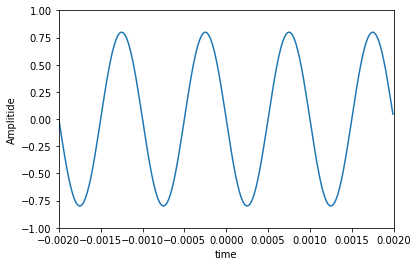

In [6]:
# Plotting the signal 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(t,x)
ax.axis([-0.002, .002, -1, 1])
ax.set_xlabel('time')
ax.set_ylabel('Amplitide')
plt.show()

## Generating a Complex sine wave

For generating a complex sine wave we need

- k : number of cycles (period)
- N : number of samples

In [7]:
N = 500
k = 5

In [8]:
# First we generate an array with all sample values ranging from -N/2 to N/2 [ or also 0 to N]
n = np.arange(-N/2, N/2)

In [9]:
# Generating the complex sine wave
x = np.exp( -1j * 2 * np.pi * k * n / N)
# x = e to the power ( 1j * 2 * pi * k * n / N) 

In [10]:
def plot(complex_signal):
    
    N = complex_signal.shape[0]
    n = np.arange(0, N)
    
    # Plotting the signal 
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_subplot(1,1,1)

    # We can plot either real or imaginary at once
    # Plotting real part in blue
    ax.plot(n,np.real(complex_signal), c = 'b', label = 'real')
    # Plotting real part in red
    ax.plot(n,np.imag(complex_signal), c = 'r', label = 'imaginary')
    ax.axis([0, N-1, -1, 1])
    ax.set_xlabel('samples')      
    ax.set_ylabel('Amplitide')
    ax.legend(loc = 'upper right')
    ax.grid(True, linestyle = '-.', linewidth=0.8)
    plt.show()

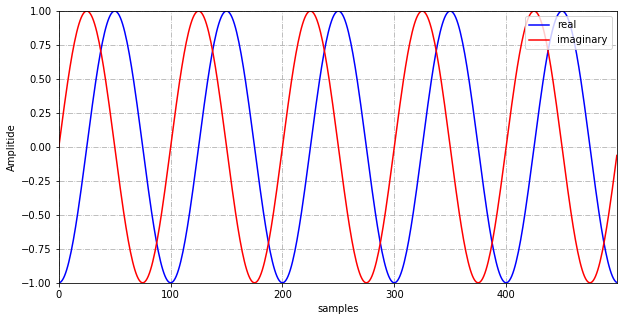

In [11]:
plot(x)

# DFT - Discrete Fourier Transform

Identifies all the frequencis present in the siganl i.e. it gives the spectrum of a signal as an output.

In [12]:
def generate_complex_sine(k, N):
    """
    Inputs:
        k (integer) = frequency index of the complex sinusoid of the DFT
        N (integer) = length of complex sinusoid in samples
    Output:
        The function should return a numpy array
        cSine (numpy array) = The generated complex sinusoid (length N)
        
    The amplitude of such a complex sinusoid is 1, the length is N, and the frequency in radians is 2*pi*k/N.
    """
    ## Your code here
    assert k < N-1, "k should be less than N-1"
    n = np.arange(N)
    x = np.exp( -1j * 2 * np.pi * k/N * n )
    return x

In [13]:
def DFT(signal):
    """ 
    Performs DFT analysis on a given signal
    """
    N_samples = signal.shape[0]
    # we need to initialize an empty array to store the DFT values 
    X = np.array([])

    # we have to loop on each sample in the signal to gather the DFT information
    # Remember we generatred the complex sine wave with N samples
    kv = np.arange(0, N_samples)
    for k in kv:
        s = np.exp( 1j * 2 * np.pi * k/N_samples * np.arange(N_samples))    # s is the complex sine part of DFT
        X = np.append(X, sum( signal * np.conjugate(s)))         # x is the signal, X is the DFT
    
    return X

In [14]:
def plot_DFT(DFT_signal):
    """
    Plots DFT
    """
    # Plotting the DFT
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_subplot(1,1,1)
    
    N_samples = DFT_signal.shape[0]
    n = np.arange(0,N_samples)   
    ax.plot(n, abs(DFT_signal))
    ax.axis([0, N_samples-1, 0, N_samples])
    ax.set_xlabel('samples')
    ax.set_ylabel('Amplitide')
    ax.grid(True, linestyle = '-.', linewidth=0.8)
    plt.show()

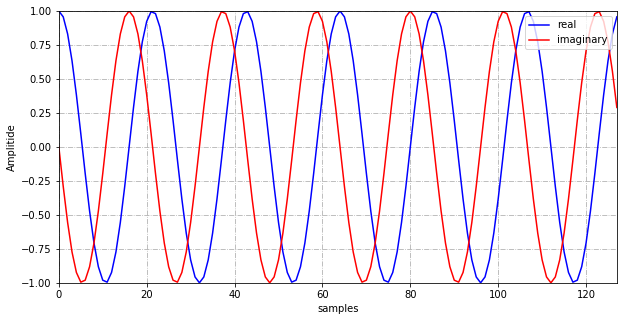

In [17]:
# Generating complex wave
x = generate_complex_sine(6,128)
plot(x)

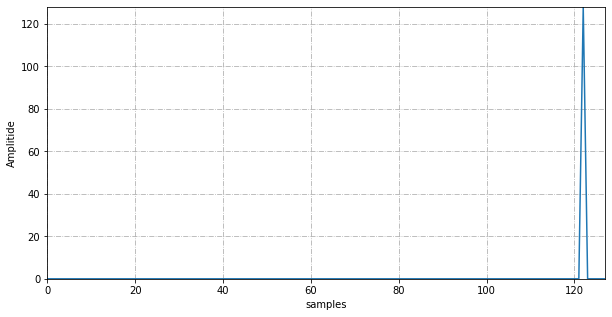

In [18]:
# performing DFT 
X_complex = DFT(x)
plot_DFT(X_complex)

In [19]:
def generate_real_sine(N, k):
    n = np.arange(N)    
    x = np.cos( 2 * np.pi * k * n / N)
    return x

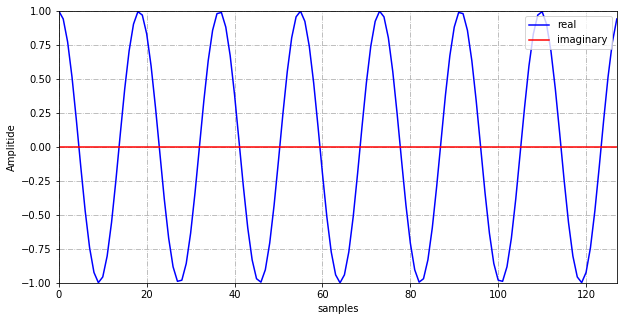

In [21]:
real_sin = generate_real_sine(128, 7)
plot(real_sin)

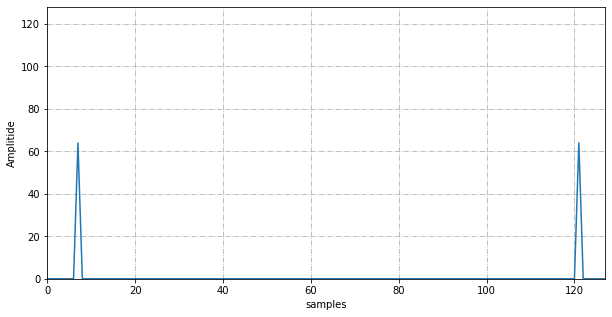

In [22]:
X_real = DFT(real_sin)
plot_DFT(X_real)

# Inverse DFT 

Reconstructs the signal from the spectrum

In [23]:
def Inverse_DFT(DFT_signal):
    
    # Empty array to store the signal
    y = np.array([])
    
    N_samples = DFT_signal.shape[0]
    nv = np.arange(0, N_samples)
    kv = np.arange(0, N_samples)
    
    for n in nv:
        s = np.exp(1j * 2 * np.pi * n/ N_samples * kv)
        y = np.append(y, 1/N_samples * np.sum(DFT_signal * s))
        
    return y

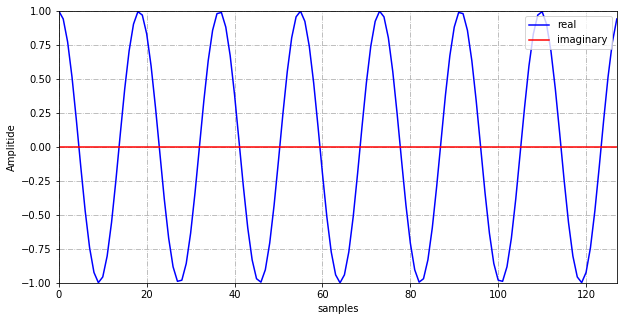

In [24]:
# Reconstructing real sine wave from DFT
y = Inverse_DFT(X_real)
plot(y)

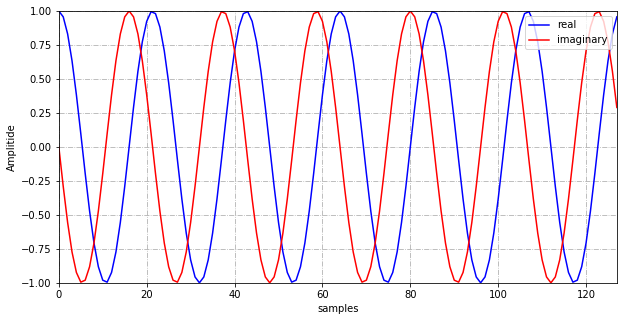

In [25]:
# Reconstructing complex sine wave from DFT
y = Inverse_DFT(X_complex)
plot(y)

In [26]:
def genMagSpec(signal):
    """ 
    Generates Magnitude spectrum of a signal
    """
    # Perform DFT on input signal first
    X = DFT(signal)
    # Take the absolute values of each element to get the magnitude
    X = np.abs(X)
    return X

In [27]:
def genPhaseSpec(signal):
    """ 
    Generates Phase spectrum of a signal
    """
    # Perform DFT on input signal first
    X = DFT(signal)
    # Measure the phase at each element of the DFT
    X = np.angle(X, deg = True)
    return X